<p style="font-size:36px;text-align:center"> <b>Network Intrusion Detection System(NIDS)</b> </p>

<h1>1. Business Problem</h1>

- Intrusion/attacks are a set of events which can compromise the principles of computer network such as integrity, availability, authority and confidentiality. Modern attacks environments cannot be detected by firewalls so that NIDS are designed to achieve high protection from cyber attacks.
- A Network Intrusion Detection System (NIDS) monitors network traffic flow to detect malicious activity.NIDS are classified basically into two types viz Signature based and Anomaly based detection system.Anomaly based detection system are used nowadays due their superiority in detecting unknown attacks.

<h6>1.1 Problem statement : </h6>
<p> To Detect Malicious Activity and Normal Activity by monitoring network traffic  </p>

<h6>1.2 Source/Useful Links : </h6>

Some articles and reference blogs about the problem statement

1. http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html
2. https://en.wikipedia.org/wiki/Intrusion_detection_system
3. https://www.geeksforgeeks.org/intrusion-detection-system-ids/

<h6>1.3. Real-world/Business objectives and constraints.</h6>

* No low-latency requirement.
* Errors can be very costly.

<h1>2. Machine Learning Problem Formulation</h1>

<h2>2.1. Data</h2>

<h3>2.1.1. Data Overview</h3>

- Source:- http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html
- We have dataset containing 494021 datapoints and  42 features.Dataset have missing name for columns.Dataset consists of 41 features to work upon and 1 class label
- <p> 
    Label:
    <ul> 
        <li>
       0: Normal Activity
        </li>
        <li>
        1: Malicious Activity
        </li>
    </ul>
</p>


<h2>2.2. Mapping the real-world problem to an ML problem</h2>

<h3>2.2.1. Type of Machine Learning Problem</h3>

<p>
     
     
       We need to predict a given datapoint belongs to label 0 or 1 => Binary classification problem


</p>

<h3>2.2.2. Performance Metric</h3>

* Accuracy 
* Confusion matrix 

<h2>2.3. Train, CV and Test Datasets</h2>

The dataset is split randomly into three parts train, cross validation and test with 64%,16%, 20% of total data respectively

## 2.4 Importing important Libraries

In [570]:
import warnings
warnings.filterwarnings("ignore")
import shutil
import os
import pandas as pd
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd
from multiprocessing import Process# this is used for multithreading
import multiprocessing
import codecs# this is used for file operations 
import random as r
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm
%matplotlib inline

## 2.5. Reading Data

In [571]:
col = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]

In [572]:
total_data=pd.read_csv('kddcup.data_10_percent_corrected',header=None, names = col)

In [573]:
total_data.head(2)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.


In [574]:
total_data.shape

(494021, 42)

In [575]:
total_data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148247,0.010212,...,232.470778,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.746472,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355345,1.798326,...,64.745380,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [576]:
total_data.columns.values

array(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label'], dtype=object)

In [577]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
duration                       494021 non-null int64
protocol_type                  494021 non-null object
service                        494021 non-null object
flag                           494021 non-null object
src_bytes                      494021 non-null int64
dst_bytes                      494021 non-null int64
land                           494021 non-null int64
wrong_fragment                 494021 non-null int64
urgent                         494021 non-null int64
hot                            494021 non-null int64
num_failed_logins              494021 non-null int64
logged_in                      494021 non-null int64
num_compromised                494021 non-null int64
root_shell                     494021 non-null int64
su_attempted                   494021 non-null int64
num_root                       494021 non-null int64
num_file_creations             494021 

# 3. Exploratory Data Analysis

## 3.1 Basic preprocessing

In [578]:
total_data['label'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: label, dtype: int64

In [579]:
attack=['smurf.','neptune.',' normal.','back.','satan.','ipsweep.','portsweep.','warezclient.','teardrop.','pod.','nmap.','guess_passwd.','buffer_overflow.','land.','warezmaster.','imap.','rootkit.','loadmodule.','ftp_write.','multihop.','phf.','perl.','spy.']                     

In [580]:
total_data['label']=total_data['label'].replace(attack,'attacks')

In [581]:
total_data['label'].value_counts()

attacks    396743
normal.     97278
Name: label, dtype: int64

In [582]:
total_data['label']=total_data['label'].replace('normal.',0)
total_data['label']=total_data['label'].replace('attacks',1)

In [583]:
total_data['label'].value_counts()

1    396743
0     97278
Name: label, dtype: int64

In [584]:
total_data['service'].value_counts()

ecr_i      281400
private    110893
http        64293
smtp         9723
other        7237
            ...  
X11            11
tim_i           7
pm_dump         1
tftp_u          1
red_i           1
Name: service, Length: 66, dtype: int64

In [585]:
total_data['protocol_type'].value_counts()

icmp    283602
tcp     190065
udp      20354
Name: protocol_type, dtype: int64

In [586]:
total_data['flag'].value_counts()

SF        378440
S0         87007
REJ        26875
RSTR         903
RSTO         579
SH           107
S1            57
S2            24
RSTOS0        11
S3            10
OTH            8
Name: flag, dtype: int64

In [587]:
total_data.columns.isnull().sum()

0

In [588]:
total_data.columns.values

array(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label'], dtype=object)

In [589]:
total_data['flag'].value_counts()

SF        378440
S0         87007
REJ        26875
RSTR         903
RSTO         579
SH           107
S1            57
S2            24
RSTOS0        11
S3            10
OTH            8
Name: flag, dtype: int64

## 3.2 Correlation Analysis

In [590]:
corr_mat=total_data.corr()

In [591]:
numcolumn=['duration','src_bytes','dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate']

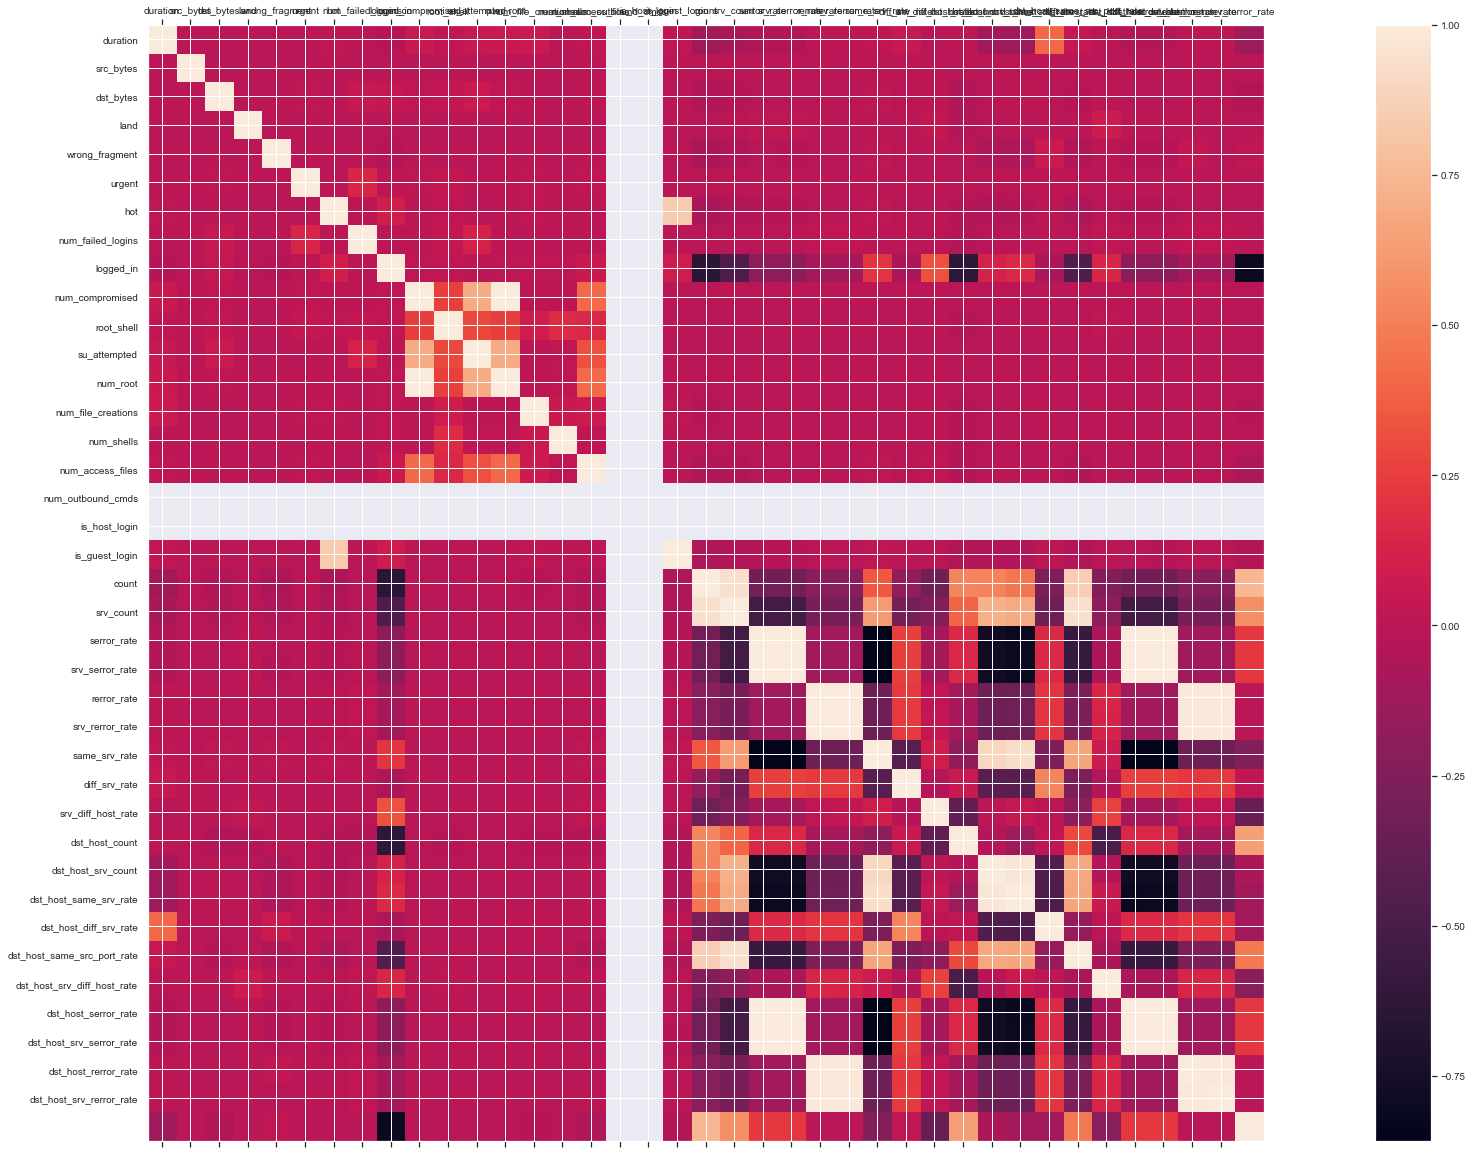

In [592]:
plt.figure(figsize=(40,20))
plt.matshow(corr_mat,fignum=1)
plt.xticks(range(len(numcolumn)),numcolumn)
plt.yticks(range(len(numcolumn)),numcolumn)
plt.colorbar()
plt.show()

In [593]:
def corr_columns(corr_matrix):
    numcolumn=list(corr_matrix.columns.values)
    b=[]
    for i in range(len(numcolumn)):
        for j in range(len(numcolumn)):
            a=[]
            if i!=j:
                if corr_matrix.iat[i,j]>0.80:
                    a.append(numcolumn[i])
                    a.append(numcolumn[j])
                    b.append(a)
    return b

In [594]:
c=corr_columns(corr_mat)

In [595]:
for i in range(len(c)):
        for j in range(len(c)):
            try:
                if c[i][0]==c[j][1] and c[i][1]==c[j][0]:
                    print(c.pop(j))
            except IndexError:
                pass

['is_guest_login', 'hot']
['num_root', 'num_compromised']
['srv_count', 'count']
['dst_host_same_src_port_rate', 'count']
['dst_host_same_src_port_rate', 'srv_count']
['srv_serror_rate', 'serror_rate']
['dst_host_serror_rate', 'serror_rate']
['dst_host_srv_serror_rate', 'serror_rate']
['dst_host_serror_rate', 'srv_serror_rate']
['dst_host_srv_serror_rate', 'srv_serror_rate']
['srv_rerror_rate', 'rerror_rate']
['dst_host_rerror_rate', 'rerror_rate']
['dst_host_srv_rerror_rate', 'rerror_rate']
['dst_host_rerror_rate', 'srv_rerror_rate']
['dst_host_srv_rerror_rate', 'srv_rerror_rate']
['dst_host_srv_count', 'same_srv_rate']
['dst_host_same_srv_rate', 'same_srv_rate']
['dst_host_same_srv_rate', 'dst_host_srv_count']
['dst_host_srv_serror_rate', 'dst_host_serror_rate']
['dst_host_srv_rerror_rate', 'dst_host_rerror_rate']


## 3.3. Univariate Analysis

### 3.3.1 Boxplot of features

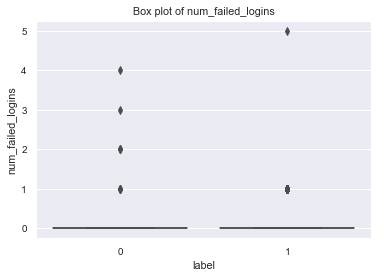

In [596]:
ax = sns.boxplot(y='num_failed_logins',x="label",data=total_data)
plt.title("Box plot of num_failed_logins")
plt.show()

Observations:
1. number of failed logins for class 1 are 5 or 1 maximum times but for class o ,they are evenly distributed.

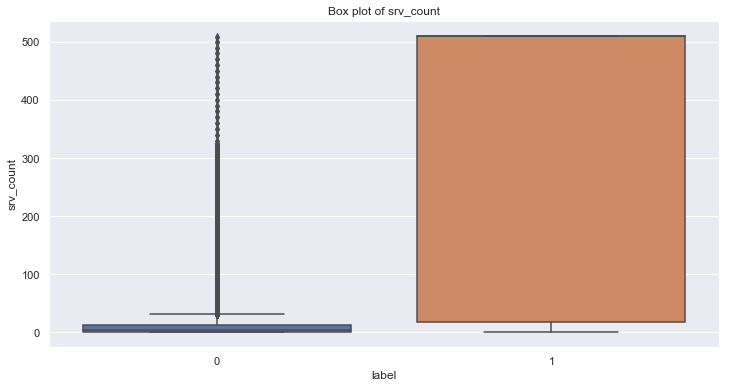

In [266]:
ax = sns.boxplot(y='srv_count',x="label",data=total_data)
plt.title("Box plot of srv_count")
plt.show()

Observations:
1. 75% of srv_count are less than 10 for class 0 but for  class 1 srv_count is very high.

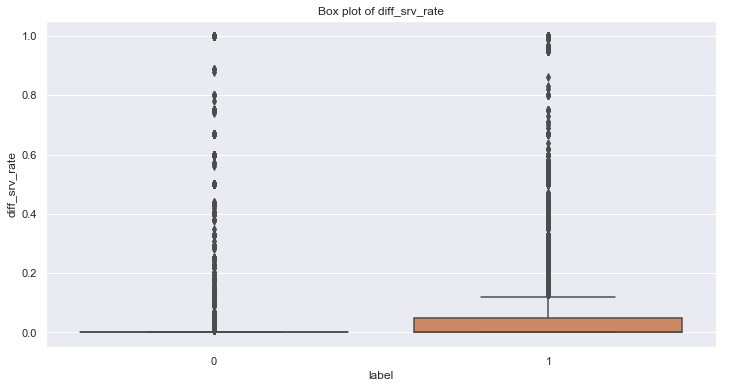

In [267]:
ax = sns.boxplot(y='diff_srv_rate',x="label",data=total_data)
plt.title("Box plot of diff_srv_rate")
plt.show()

Observations:
1. for label 0 diff_serv_rate has value in range of 0 to 1 but for label 1 it has value less than 0.1 except some outliers.

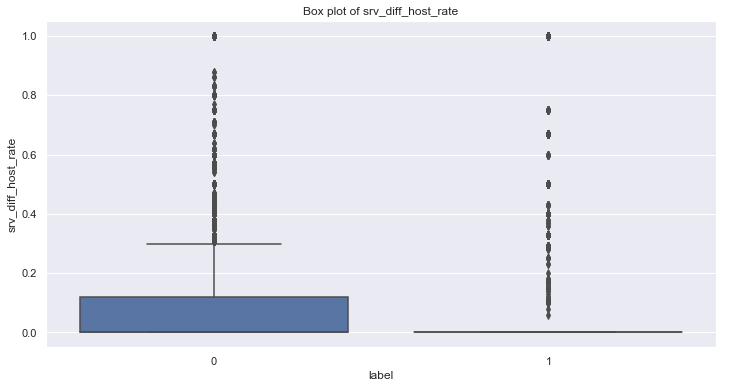

In [268]:
ax = sns.boxplot(y='srv_diff_host_rate',x="label",data=total_data)
plt.title("Box plot of srv_diff_host_rate")
plt.show()

Observations:
1. srv_diff_host_rate has 3rd quartile values less than 0.1 for label 0

### 3.3.2 Histogram of features

Text(0, 0.5, 'count')

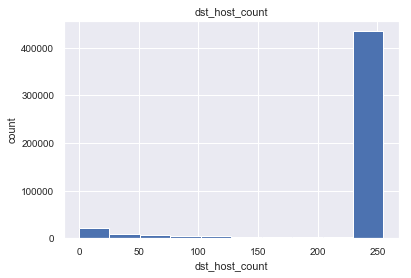

In [215]:
ax=total_data.hist(column='dst_host_count')
pl.xlabel('dst_host_count')
pl.ylabel('count')

Observations:
1. dst houst count has most of the values greater than 225.

Text(0, 0.5, 'count')

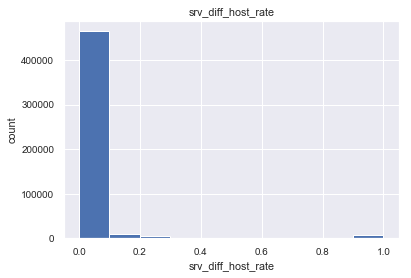

In [214]:
ax=total_data.hist(column='srv_diff_host_rate')
pl.xlabel('srv_diff_host_rate')
pl.ylabel('count')

Observations:
1. srv_diff_host_rate is most of the times less than 0.2.

Text(0, 0.5, 'count')

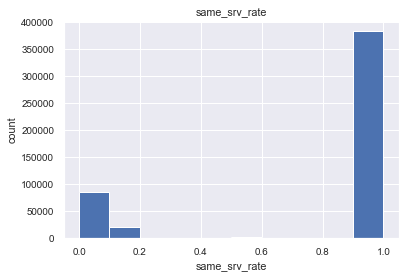

In [219]:
import pylab as pl
ax=total_data.hist(column='same_srv_rate')
pl.xlabel('same_srv_rate')
pl.ylabel('count')

Observations:
1. same_srv_rate has most of the values greater than 225.

Text(0, 0.5, 'count')

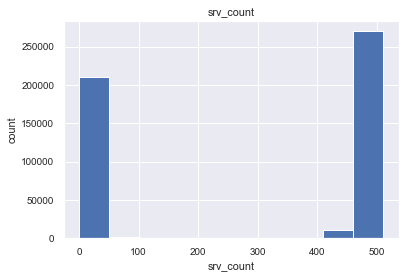

In [208]:
ax=total_data.hist(column='srv_count')
pl.xlabel('srv_count')
pl.ylabel('count')

Observations:
1. srv_count is either less than 50 or greater than 400.

### 3.3.3 Barplots of categorical data

In [220]:
total=len(total_data)

Text(0.5, 1.02, 'Different flag Categories')

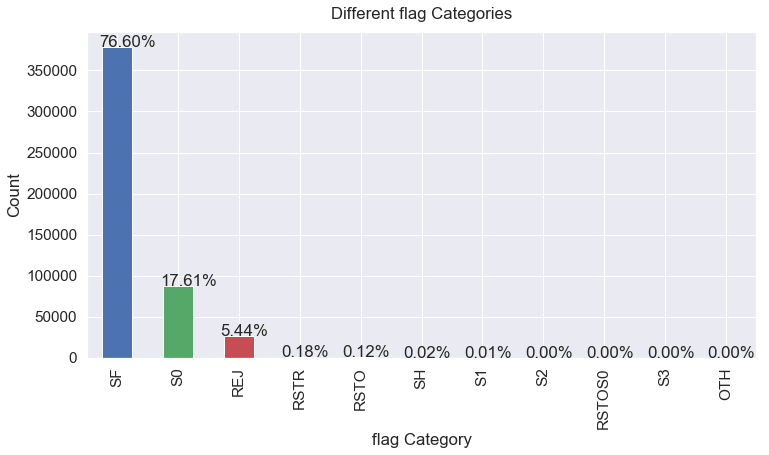

In [222]:
sns.set(font_scale=1.4)
ax=total_data['flag'].value_counts().plot(kind='bar',color=['b','g','r','y','m','c','k'],figsize=(12,6))
for p in ax.patches:
        ax.annotate('{:.2f}%'.format(100*p.get_height()/total), (p.get_x()-0.05, p.get_height()+100))
plt.xlabel("flag Category")
plt.ylabel("Count")
plt.title("Different flag Categories",y=1.02)

Observations:
1. SF,S0 and REJ flags present in almost 90% of data.
2. SF flag is most commonly occuring in the data

Text(0.5, 1.02, 'Different Protocol types')

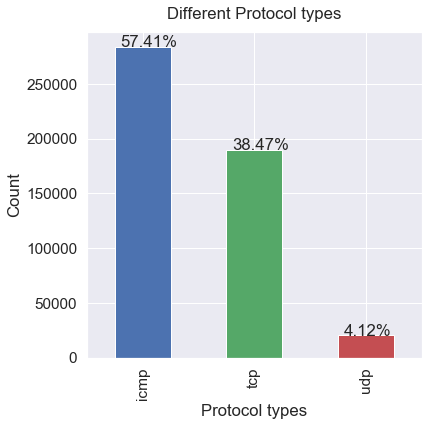

In [226]:
sns.set(font_scale=1.4)
ax=total_data['protocol_type'].value_counts().plot(kind='bar',color=['b','g','r','y','m','c','k'],figsize=(6,6))
for p in ax.patches:
        ax.annotate('{:.2f}%'.format(100*p.get_height()/total), (p.get_x()+0.05, p.get_height()+100))
plt.xlabel("Protocol types")
plt.ylabel("Count")
plt.title("Different Protocol types",y=1.02)

Observations:
1. icmp and tcp protocols present in almost 95% of data.
2. icmp protocol is most commonly occuring protocol in the data

Text(0.5, 1.02, 'Different service')

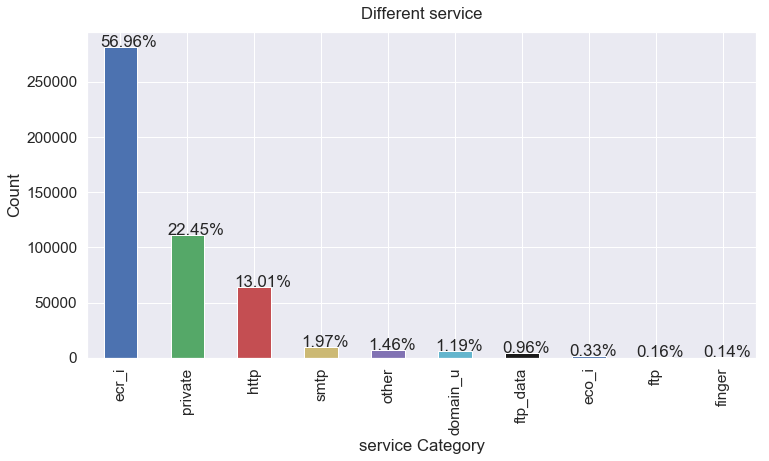

In [227]:
sns.set(font_scale=1.4)
ax=total_data['service'].value_counts()[0:10].plot(kind='bar',color=['b','g','r','y','m','c','k'],figsize=(12,6))
for p in ax.patches:
        ax.annotate('{:.2f}%'.format(100*p.get_height()/total), (p.get_x()-0.05, p.get_height()+100))
plt.xlabel("service Category")
plt.ylabel("Count")
plt.title("Different service",y=1.02)

Observations:
1. Out of 66 service category present in data only 3 categories occur most frequently.
2. The 3 most commonly occuring service categories are ecr_i, private and http.

### 3.3.4 Stacked bar plot of features

Text(0.5, 1.02, 'Different types of protocols')

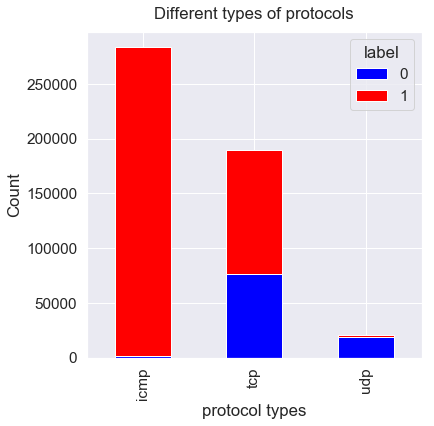

In [235]:
ax=total_data.groupby(['protocol_type','label']).protocol_type.count()
ax.unstack().sort_values(by=[0 or 1],ascending=False)[0:10].plot(kind='bar',stacked=True,color=['blue','red'],figsize=(6,6))
plt.xlabel("protocol types")
plt.ylabel("Count")
plt.title("Different types of protocols",y=1.02)

Observations:
1. icmp protocol contains almost all the data labeled as 1
2. udp protocol has most of the label 0 data

Text(0.5, 1.02, 'Different types of services')

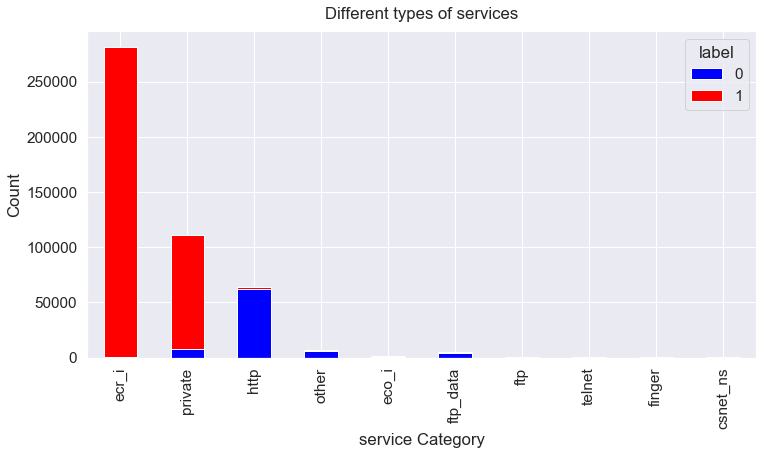

In [240]:
ax=total_data.groupby(['service','label']).service.count()
ax=ax.unstack()
ax=ax.sort_values(by=[0 or 1],ascending=False)[0:10]
ax.plot(kind='bar',stacked=True,color=['blue','red'],figsize=(12,6))
plt.xlabel("service Category")
plt.ylabel("Count")
plt.title("Different types of services",y=1.02)

Observations:
1. Most of the data having service category as ecr_i and private is labeled as class 1.
2. Most of the data having service category as http is labeled as class 0.

Text(0.5, 1.02, 'Different types of flags')

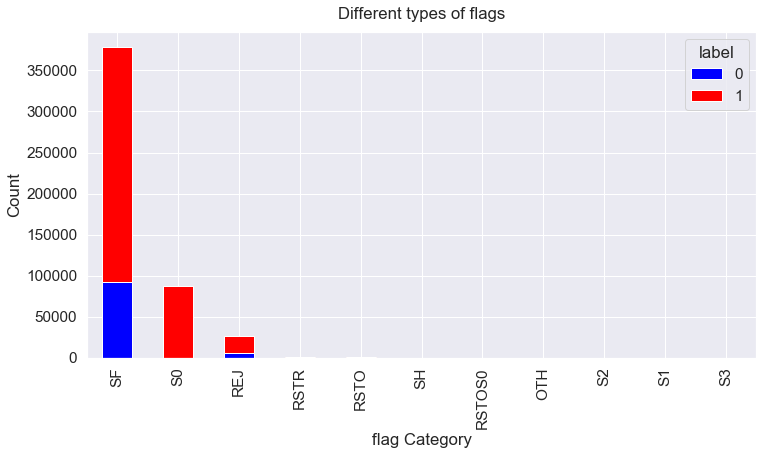

In [241]:
ax=total_data.groupby(['flag','label']).flag.count()
ax.unstack().sort_values(by=[0 or 1],ascending=False).plot(kind='bar',stacked=True,color=['blue','red'],figsize=(12,6))
plt.xlabel("flag Category")
plt.ylabel("Count")
plt.title("Different types of flags",y=1.02)

Observations:
1. S0 and REJ flag are labeled as 1 for most of the times.

## 3.4 Multivariate Analysis

### 3.4.1 Scatter plot between pair of features

Text(0.5, 1.02, "dst_host_diff_srv_rate v/s'dst_host_srv_diff_host_rate'")

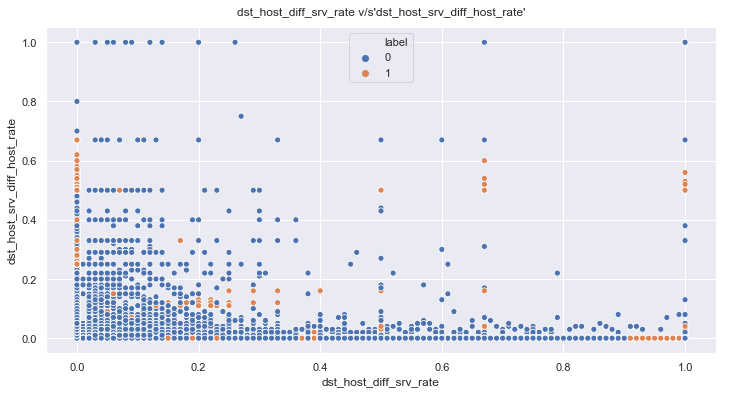

In [270]:
sns.scatterplot(x='dst_host_diff_srv_rate',y='dst_host_srv_diff_host_rate',data=total_data,hue='label')
plt.title("dst_host_diff_srv_rate v/s'dst_host_srv_diff_host_rate'",y=1.02)

Observations:
1. dst_host_diff_srv_rate and dst_host_srv_diff_host_rate are always less than1

Text(0.5, 1.02, 'srv_rerror_rate v/s srv_rerror_rate')

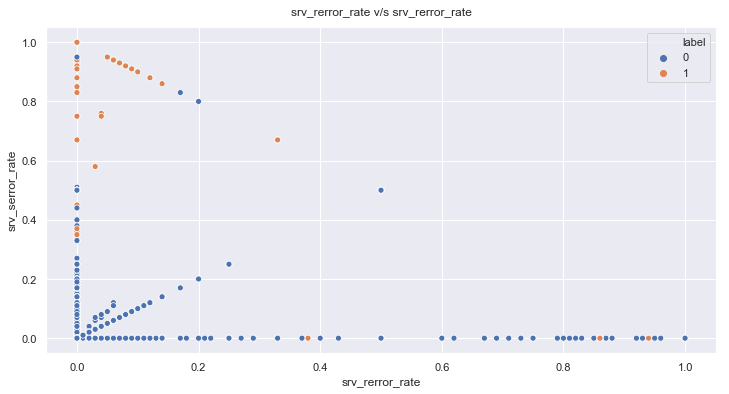

In [271]:
sns.scatterplot(x='srv_rerror_rate',y='srv_serror_rate',data=total_data,hue='label')
plt.title("srv_rerror_rate v/s srv_rerror_rate",y=1.02)

Observations:
1. srv_serror_rate and srv_rerror_rate  have linear relationship for rate less than 0.2

Text(0.5, 1.02, 'srv_count v/s srv_serror_rate')

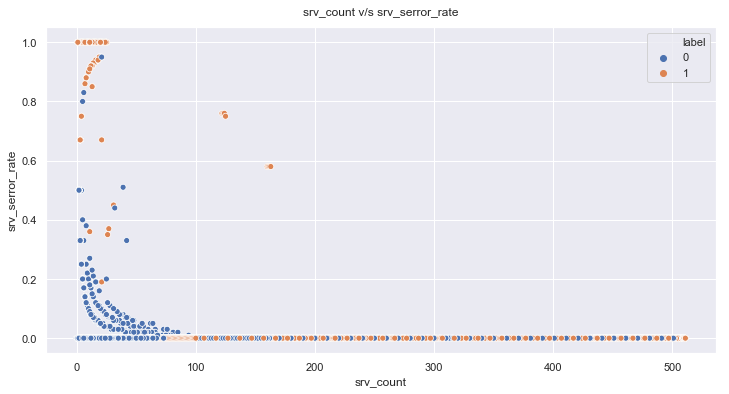

In [272]:
sns.scatterplot(x='srv_count',y='srv_serror_rate',data=total_data,hue='label')
plt.title("srv_count v/s srv_serror_rate",y=1.02)

Observations:
1.for srv_count less than 100 srv_serror_rate decreases parabolically as srv_count increases

### 3.4.2 Boxplot between pair of features

Text(0.5, 1.02, "boxplot of 'dst_host_diff_srv_rate' and 'flag'")

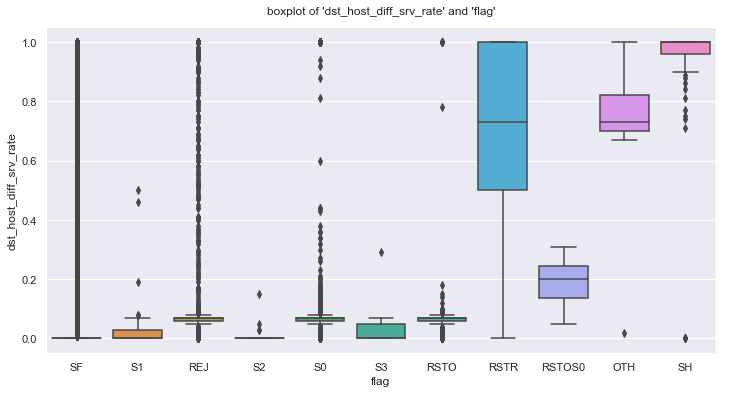

In [273]:
sns.boxplot(x='flag',y='dst_host_diff_srv_rate',data=total_data)
plt.title("boxplot of dst_host_diff_srv_rate and flag",y=1.02)

Observations:
1.RSTR ,OTH and SH flags can be separated from others on the basis of dst_host_diff_srv_rate.

Text(0.5, 1.02, 'boxplot of dst_host_count and flag')

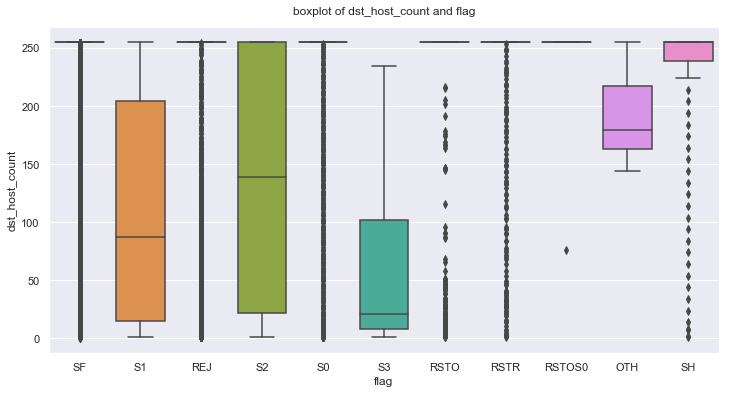

In [274]:
sns.boxplot(x='flag',y='dst_host_count',data=total_data)
plt.title("boxplot of dst_host_count and flag",y=1.02)

Observations:
1. S3 flag has 75% dst_host_count values less than 100.

Text(0.5, 1.02, 'boxplot of srv_count and flag')

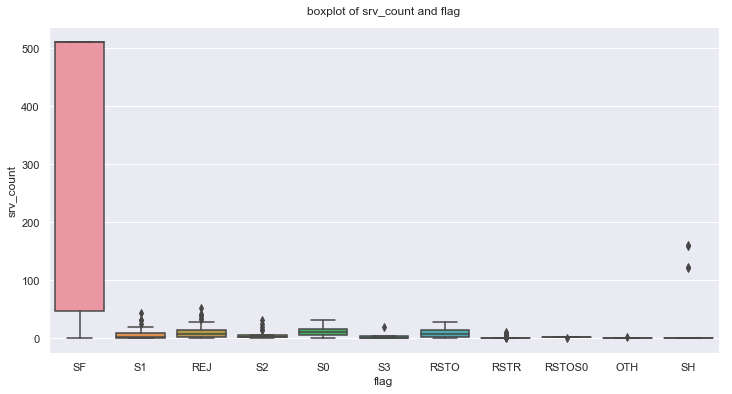

In [275]:
sns.boxplot(x='flag',y='srv_count',data=total_data)
plt.title("boxplot of srv_count and flag",y=1.02)

Observations:
1. SF flag can be easily separated from rest of the flags on the basis of srv_count values
2. SF flag has most of the srv_count values greater than 50

## 3.5 PDF and CDF plots dst_bytes

In [597]:
td_0 = total_data.loc[total_data["label"] == 0];
td_1 = total_data.loc[total_data["label"] == 1];

[9.99588807e-01 1.74756882e-04 1.13077983e-04 4.11192664e-05
 4.11192664e-05 1.02798166e-05 0.00000000e+00 2.05596332e-05
 0.00000000e+00 1.02798166e-05]
[      0.   513421.8 1026843.6 1540265.4 2053687.2 2567109.  3080530.8
 3593952.6 4107374.4 4620796.2 5134218. ]


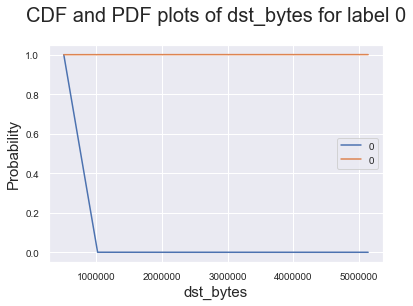

In [613]:
counts, bin_edges = np.histogram(td_0['dst_bytes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.title("CDF and PDF plots of dst_bytes for label 0",y=1.08,fontsize=20)
plt.xlabel('dst_bytes',fontsize=15)
plt.ylabel('Probability',fontsize=15)
plt.legend("00")

plt.show();

[9.99954631e-01 5.04104672e-06 2.52052336e-06 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.78078504e-05]
[      0.   515546.8 1031093.6 1546640.4 2062187.2 2577734.  3093280.8
 3608827.6 4124374.4 4639921.2 5155468. ]


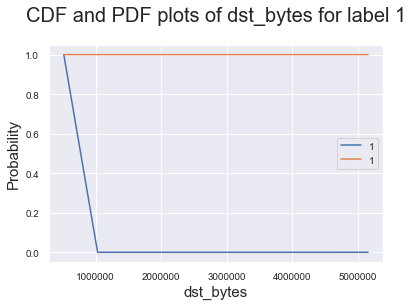

In [614]:
counts, bin_edges = np.histogram(td_1['dst_bytes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.title("CDF and PDF plots of dst_bytes for label 1",y=1.08,fontsize=20)
plt.xlabel('dst_bytes',fontsize=15)
plt.ylabel('Probability',fontsize=15)
plt.legend("11")
#Y=survived N=Not Survived



plt.show();

Observation:
1. Both cdf and pdf plots for label 0 and label 1 are overlapping.
2. As the number of dst_bytes increases probability decreases for both class labels. 

## 3.5 Conclusions from EDA

1. EDA shows that there are 20 pairs of numerical features which are highly correlated having correlation coefficient greater than 0.8.
2. There are only few sub_categories in every category that are dominant than others.
3. Univariate analysis is carried out using boxplot,barplot and histogram shows the frequency of data with respect to each feature.
4. Bivariate analysis using scatter plot shows the relation between pair of features.
5. It seems from eda that dst_host_count,srv_count,S0,SF,icmp,http could be the best features for modelling.

# 4.Preparing Data For Models

In [27]:
X=total_data

In [28]:
y=total_data['label'].values
total_data.drop(['label','hot','num_compromised','count','dst_host_same_src_port_rate','serror_rate','dst_host_serror_rate','dst_host_srv_serror_rate','rerror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','dst_host_srv_count','dst_host_same_srv_rate',], axis=1, inplace=True)
total_data.head(1)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,num_failed_logins,...,is_guest_login,srv_count,srv_serror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_diff_srv_rate,dst_host_srv_diff_host_rate
0,0,tcp,http,SF,181,5450,0,0,0,0,...,0,8,0.0,0.0,1.0,0.0,0.0,9,0.0,0.0


## 4.1 Train-Test split

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=42)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.2,stratify=y_train,random_state=42)

In [30]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_cv.shape)
print(y_cv.shape)

(316172, 29)
(98805, 29)
(316172,)
(98805,)
(79044, 29)
(79044,)


In [31]:
total_data.columns.values

array(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent',
       'num_failed_logins', 'logged_in', 'root_shell', 'su_attempted',
       'num_root', 'num_file_creations', 'num_shells', 'num_access_files',
       'num_outbound_cmds', 'is_host_login', 'is_guest_login',
       'srv_count', 'srv_serror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_diff_srv_rate', 'dst_host_srv_diff_host_rate'],
      dtype=object)

In [32]:
b=['duration','src_bytes','dst_bytes','land','wrong_fragment','urgent',
       'num_failed_logins', 'logged_in', 'root_shell', 'su_attempted',
       'num_root', 'num_file_creations', 'num_shells', 'num_access_files',
       'num_outbound_cmds', 'is_host_login', 'is_guest_login',
       'srv_count','srv_serror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate','srv_diff_host_rate', 'dst_host_count',
       'dst_host_diff_srv_rate', 'dst_host_srv_diff_host_rate']

## 4.2 Encoding Catagorical Features

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

In [34]:
a=[]

vec = CountVectorizer() 
X_train_proto_ohe = vec.fit_transform(X_train['protocol_type'].values)
X_cv_proto_ohe = vec.transform(X_cv['protocol_type'].values)
X_test_proto_ohe = vec.transform(X_test['protocol_type'].values)
print("After vectorizations")
print(X_train_proto_ohe.shape, y_train.shape)
print(X_cv_proto_ohe.shape, y_cv.shape)
print(X_test_proto_ohe.shape, y_test.shape)
print(vec.get_feature_names())
print("-"*125)
a.extend(vec.get_feature_names())

After vectorizations
(316172, 3) (316172,)
(79044, 3) (79044,)
(98805, 3) (98805,)
['icmp', 'tcp', 'udp']
-----------------------------------------------------------------------------------------------------------------------------


In [35]:
vec = CountVectorizer() 
X_train_service_ohe = vec.fit_transform(X_train['service'].values)
X_cv_service_ohe = vec.transform(X_cv['service'].values)
X_test_service_ohe = vec.transform(X_test['service'].values)
print("After vectorizations")
print(X_train_service_ohe.shape, y_train.shape)
print(X_cv_service_ohe.shape, y_cv.shape)
print(X_test_service_ohe.shape, y_test.shape)
print(vec.get_feature_names())
print("-"*125)
a.extend(vec.get_feature_names())

After vectorizations
(316172, 64) (316172,)
(79044, 64) (79044,)
(98805, 64) (98805,)
['auth', 'bgp', 'courier', 'csnet_ns', 'ctf', 'daytime', 'discard', 'domain', 'domain_u', 'echo', 'eco_i', 'ecr_i', 'efs', 'exec', 'finger', 'ftp', 'ftp_data', 'gopher', 'hostnames', 'http', 'http_443', 'imap4', 'irc', 'iso_tsap', 'klogin', 'kshell', 'ldap', 'link', 'login', 'mtp', 'name', 'netbios_dgm', 'netbios_ns', 'netbios_ssn', 'netstat', 'nnsp', 'nntp', 'ntp_u', 'other', 'pm_dump', 'pop_2', 'pop_3', 'printer', 'private', 'remote_job', 'rje', 'shell', 'smtp', 'sql_net', 'ssh', 'sunrpc', 'supdup', 'systat', 'telnet', 'tim_i', 'time', 'urh_i', 'urp_i', 'uucp', 'uucp_path', 'vmnet', 'whois', 'x11', 'z39_50']
-----------------------------------------------------------------------------------------------------------------------------


In [37]:
vec = CountVectorizer() 
X_train_flag_ohe = vec.fit_transform(X_train['flag'].values)
X_cv_flag_ohe = vec.transform(X_cv['flag'].values)
X_test_flag_ohe = vec.transform(X_test['flag'].values)
print("After vectorizations")
print(X_train_flag_ohe.shape, y_train.shape)
print(X_cv_flag_ohe.shape, y_cv.shape)
print(X_test_flag_ohe.shape, y_test.shape)
print(vec.get_feature_names())
print("-"*125)
a.extend(vec.get_feature_names())

After vectorizations
(316172, 11) (316172,)
(79044, 11) (79044,)
(98805, 11) (98805,)
['oth', 'rej', 'rsto', 'rstos0', 'rstr', 's0', 's1', 's2', 's3', 'sf', 'sh']
-----------------------------------------------------------------------------------------------------------------------------


## 4.3 Encoding Numerical Features

In [38]:
col_names=b

In [39]:
from sklearn.preprocessing import Normalizer
scalar = Normalizer()
X_train_num_scalar = scalar.fit_transform(X_train[col_names].values)
X_cv_num_scalar = scalar.transform(X_cv[col_names].values)
X_test_num_scalar = scalar.transform(X_test[col_names].values)
print("After vectorizations")
print(X_train_num_scalar.shape, y_train.shape)
print(X_cv_num_scalar.shape, y_cv.shape)
print(X_test_num_scalar.shape, y_test.shape)
print("-"*125)
a.extend(b)

After vectorizations
(316172, 26) (316172,)
(79044, 26) (79044,)
(98805, 26) (98805,)
-----------------------------------------------------------------------------------------------------------------------------


In [40]:
from scipy.sparse import hstack
X_tr = hstack((X_train_proto_ohe,X_train_service_ohe,X_train_flag_ohe,X_train_num_scalar))
X_te = hstack((X_test_proto_ohe,X_test_service_ohe,X_test_flag_ohe,X_test_num_scalar))
X_cv = hstack((X_cv_proto_ohe,X_cv_service_ohe,X_cv_flag_ohe,X_cv_num_scalar))
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_te.shape, y_test.shape)
print(X_cv.shape, y_cv.shape)
print("-"*125)

Final Data matrix
(316172, 104) (316172,)
(98805, 104) (98805,)
(79044, 104) (79044,)
-----------------------------------------------------------------------------------------------------------------------------


In [41]:
len(a)

104

# 5. Machine Learning Models

In [42]:
from sklearn.metrics import accuracy_score as accuracy
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

In [43]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB

In [294]:
sns.set(font_scale=0.9)

## 5.1 Multinomial Naive Bayes

for alpha = 1e-05
Train Accuracy: 98.6346%  CV Accuracy: 98.721%
--------------------------------------------------
for alpha = 0.0001
Train Accuracy: 98.6346%  CV Accuracy: 98.721%
--------------------------------------------------
for alpha = 0.001
Train Accuracy: 98.6346%  CV Accuracy: 98.7197%
--------------------------------------------------
for alpha = 0.1
Train Accuracy: 98.6337%  CV Accuracy: 98.7172%
--------------------------------------------------
for alpha = 1
Train Accuracy: 98.6305%  CV Accuracy: 98.7134%
--------------------------------------------------
for alpha = 10
Train Accuracy: 98.4796%  CV Accuracy: 98.5476%
--------------------------------------------------
for alpha = 100
Train Accuracy: 98.3832%  CV Accuracy: 98.4376%
--------------------------------------------------
for alpha = 1000
Train Accuracy: 98.3335%  CV Accuracy: 98.3705%
--------------------------------------------------


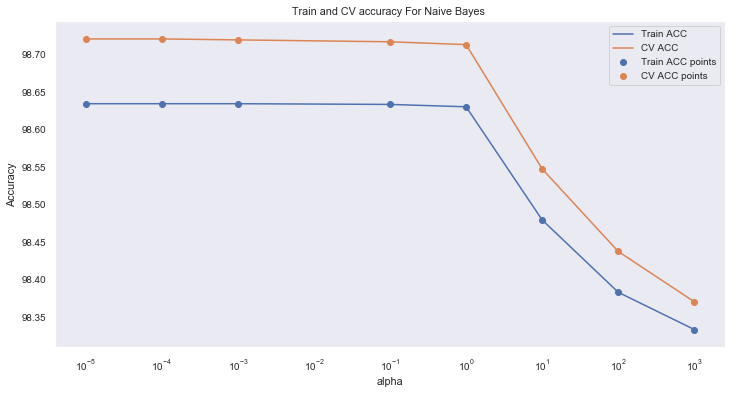

In [401]:
train_accuracy=[]
cv_accuracy = []
alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
for i in alpha:
    print("for alpha =", i)
    clf = MultinomialNB(alpha=i)
    clf.fit(X_tr, y_train)
    y_train_pred = clf.predict(X_tr)
    y_cv_pred = clf.predict(X_cv)
    train_accuracy.append(accuracy(y_train,y_train_pred)*100)
    cv_accuracy.append(accuracy(y_cv,y_cv_pred)*100)
    print("Train Accuracy: {}%  CV Accuracy: {}%".format(np.round(accuracy(y_train,y_train_pred)*100,4),np.round(accuracy(y_cv,y_cv_pred)*100,4)))
    print("-"*50)
plt.plot(alpha, train_accuracy, label='Train ACC')
plt.plot(alpha, cv_accuracy, label='CV ACC')
plt.scatter(alpha, train_accuracy, label='Train ACC points')
plt.scatter(alpha, cv_accuracy, label='CV ACC points')
plt.legend()
plt.xlabel("alpha")
plt.xscale("log")
plt.ylabel("Accuracy")
plt.title("Train and CV accuracy For Naive Bayes ")
plt.grid()
plt.show()

In [328]:
best_alpha = np.argmax(cv_accuracy)
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(X_tr,y_train)
predict_y_tr = clf.predict(X_tr)
print('For values of best alpha = ', alpha[best_alpha], "The Train Accuracy is:",np.round(accuracy(y_train, predict_y_tr)*100,4))
predict_y_cv = clf.predict(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation Accuracy is:",np.round(accuracy(y_cv, predict_y_cv)*100,4))
predict_y_te = clf.predict(X_te)
print('For values of best alpha = ', alpha[best_alpha], "The test Accuracy is:",np.round(accuracy(y_test, predict_y_te)*100,4))

For values of best alpha =  1e-05 The Train Accuracy is: 98.6346
For values of best alpha =  1e-05 The cross validation Accuracy is: 98.721
For values of best alpha =  1e-05 The test Accuracy is: 98.6731


In [329]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


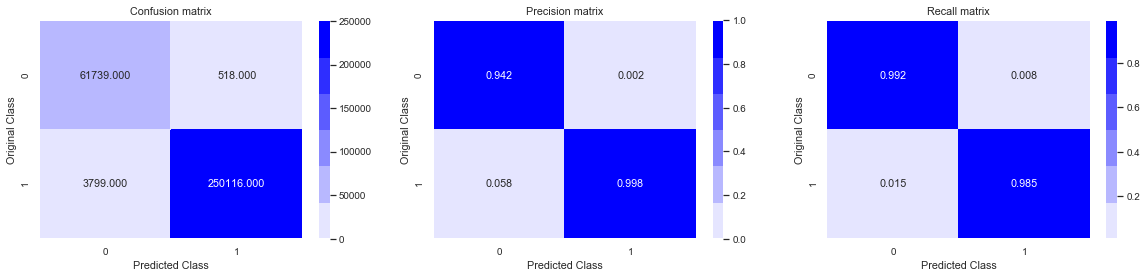

Test confusion_matrix


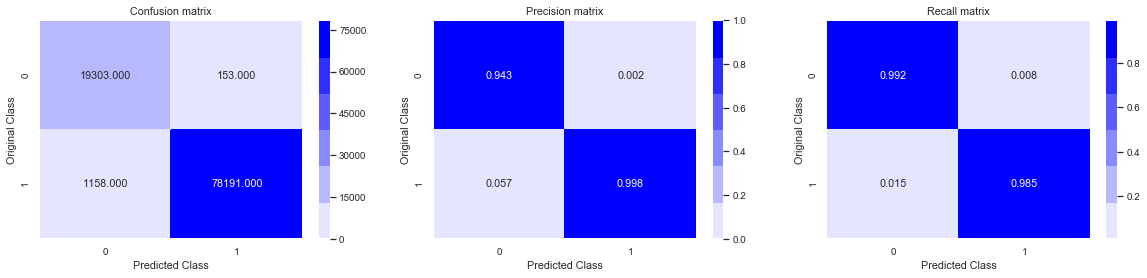

In [330]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,predict_y_tr)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,predict_y_te)

### 5.1.1 Top 10 important class label 1 features

In [389]:
sorted_idx1 = np.argsort( clf.feature_log_prob_ )[1][::-1][0:10]
top_pos=np.take(a,sorted_idx1)
print("Top 10 important class label 1 features are:",top_pos)

Top 10 important class label 1 features are: ['sf' 'icmp' 'ecr_i' 'src_bytes' 'dst_host_count' 'srv_count' 'tcp'
 'private' 's0' 'rej']


### 5.1.2 Top 10 important class label 0 features

In [391]:
sorted_idx2 = np.argsort( clf.feature_log_prob_ )[0][::-1][0:10]
top_neg=np.take(a,sorted_idx2)
print("Top 10 important class label 0 features are:",top_neg)

Top 10 important class label 0 features are: ['sf' 'tcp' 'http' 'dst_bytes' 'src_bytes' 'dst_host_count' 'udp' 'smtp'
 'private' 'domain_u']


## 5.2 Logistic Regression

for C = 1e-05
Train Accuracy: 98.3436%  CV Accuracy: 98.4072%
--------------------------------------------------
for C = 0.0001
Train Accuracy: 98.4651%  CV Accuracy: 98.5249%
--------------------------------------------------
for C = 0.001
Train Accuracy: 98.7383%  CV Accuracy: 98.7741%
--------------------------------------------------
for C = 0.1
Train Accuracy: 98.9591%  CV Accuracy: 98.9892%
--------------------------------------------------
for C = 1
Train Accuracy: 99.4699%  CV Accuracy: 99.4687%
--------------------------------------------------
for C = 10
Train Accuracy: 99.5477%  CV Accuracy: 99.5471%
--------------------------------------------------
for C = 100
Train Accuracy: 99.5942%  CV Accuracy: 99.5812%
--------------------------------------------------
for C = 1000
Train Accuracy: 99.6638%  CV Accuracy: 99.6597%
--------------------------------------------------


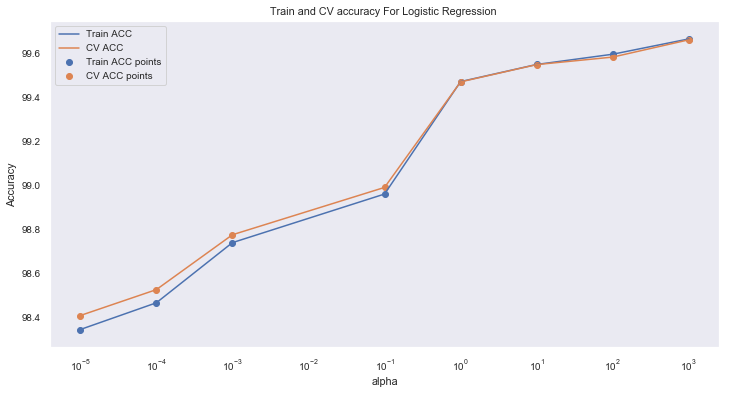

In [429]:
from sklearn.linear_model import LogisticRegression
train_accuracy=[]
cv_accuracy = []
C = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
for i in C:
    print("for C =", i)
    clf = LogisticRegression(C=i,class_weight='balanced')
    clf.fit(X_tr, y_train)
    y_train_pred = clf.predict(X_tr)
    y_cv_pred = clf.predict(X_cv)
    train_accuracy.append(accuracy(y_train,y_train_pred)*100)
    cv_accuracy.append(accuracy(y_cv,y_cv_pred)*100)
    print("Train Accuracy: {}%  CV Accuracy: {}%".format(np.round(accuracy(y_train,y_train_pred)*100,4),np.round(accuracy(y_cv,y_cv_pred)*100,4)))
    print("-"*50)
plt.plot(C, train_accuracy, label='Train ACC')
plt.plot(C, cv_accuracy, label='CV ACC')
plt.scatter(C, train_accuracy, label='Train ACC points')
plt.scatter(C, cv_accuracy, label='CV ACC points')
plt.legend()
plt.xlabel("alpha")
plt.xscale("log")
plt.ylabel("Accuracy")
plt.title("Train and CV accuracy For Logistic Regression ")
plt.grid()
plt.show()

In [430]:
best_C = np.argmax(cv_accuracy)
clf = LogisticRegression(C=C[best_C])
clf.fit(X_tr,y_train)
predict_y_tr = clf.predict(X_tr)
print('For values of best alpha = ',C[best_C], "The Train Accuracy is:",np.round(accuracy(y_train, predict_y_tr)*100,4))
predict_y_cv = clf.predict(X_cv)
print('For values of best alpha = ', C[best_C], "The cross validation Accuracy is:",np.round(accuracy(y_cv, predict_y_cv)*100,4))
predict_y_te = clf.predict(X_te)
print('For values of best alpha = ', C[best_C], "The test Accuracy is:",np.round(accuracy(y_test, predict_y_te)*100,4))

For values of best alpha =  1000 The Train Accuracy is: 99.6657
For values of best alpha =  1000 The cross validation Accuracy is: 99.642
For values of best alpha =  1000 The test Accuracy is: 99.6195


Train confusion_matrix


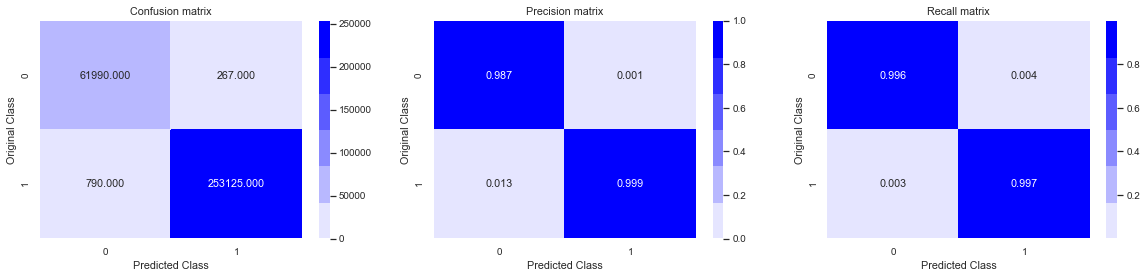

Test confusion_matrix


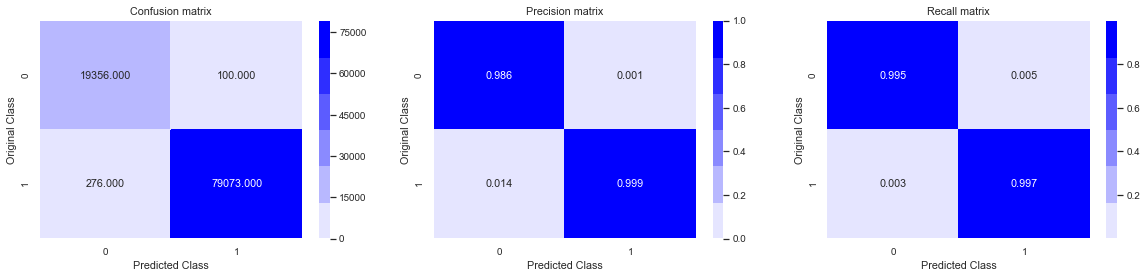

In [431]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,predict_y_tr)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,predict_y_te)

### 5.2.2 Important Features from LR model

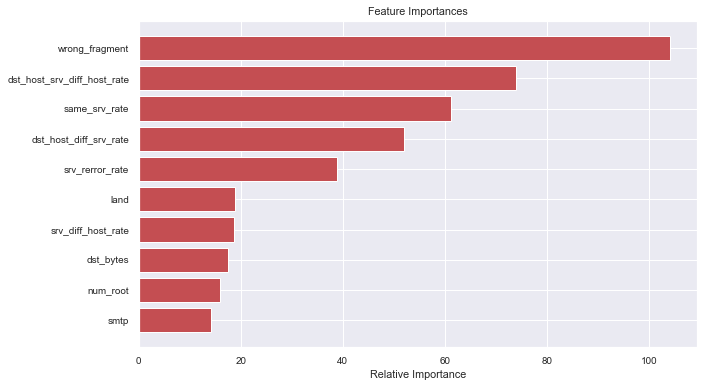

In [494]:
features=a
importances=abs(clf.coef_[0])
indices = (np.argsort(importances))[-10:]
plt.figure(figsize=(10,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()   

## 5.3 Support Vector Machines

for alpha = 0.0001
Train Accuracy: 99.4158%  CV Accuracy: 99.4218%
--------------------------------------------------
for alpha = 0.001
Train Accuracy: 98.8557%  CV Accuracy: 98.8842%
--------------------------------------------------
for alpha = 0.1
Train Accuracy: 98.7621%  CV Accuracy: 98.7981%
--------------------------------------------------
for alpha = 1
Train Accuracy: 93.192%  CV Accuracy: 93.3037%
--------------------------------------------------
for alpha = 10
Train Accuracy: 92.9994%  CV Accuracy: 93.0937%
--------------------------------------------------
for alpha = 100
Train Accuracy: 96.4222%  CV Accuracy: 96.5589%
--------------------------------------------------
for alpha = 1000
Train Accuracy: 80.3091%  CV Accuracy: 80.3084%
--------------------------------------------------


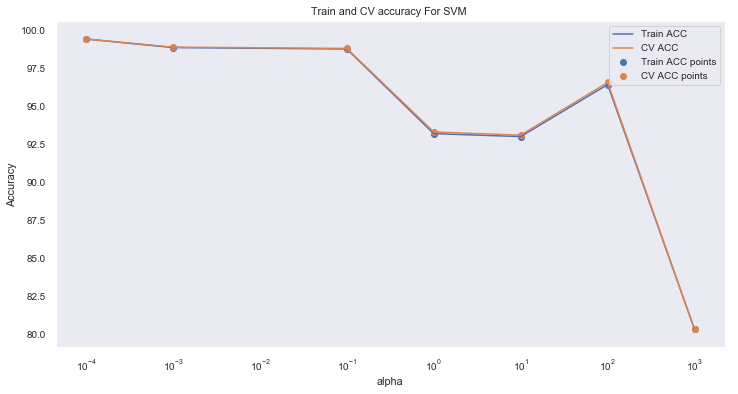

In [495]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
train_accuracy=[]
cv_accuracy = []
alpha = [0.0001, 0.001, 0.1, 1, 10, 100,1000]
for i in alpha:
    print("for alpha =", i)
    clf =SGDClassifier(alpha=i,loss='hinge',class_weight='balanced')
    #clf = CalibratedClassifierCV(SVM, cv=5, method='sigmoid')
    clf.fit(X_tr, y_train)
    y_train_pred = clf.predict(X_tr)
    y_cv_pred = clf.predict(X_cv)
    train_accuracy.append(accuracy(y_train,y_train_pred)*100)
    cv_accuracy.append(accuracy(y_cv,y_cv_pred)*100)
    print("Train Accuracy: {}%  CV Accuracy: {}%".format(np.round(accuracy(y_train,y_train_pred)*100,4),np.round(accuracy(y_cv,y_cv_pred)*100,4)))
    print("-"*50)
plt.plot(alpha, train_accuracy, label='Train ACC')
plt.plot(alpha, cv_accuracy, label='CV ACC')
plt.scatter(alpha, train_accuracy, label='Train ACC points')
plt.scatter(alpha, cv_accuracy, label='CV ACC points')
plt.legend()
plt.xlabel("alpha")
plt.xscale("log")
plt.ylabel("Accuracy")
plt.title("Train and CV accuracy For SVM ")
plt.grid()
plt.show()

In [496]:
best_alpha = np.argmax(cv_accuracy)
clf =SGDClassifier(alpha=alpha[best_alpha],loss='hinge',class_weight='balanced')
#clf = CalibratedClassifierCV(SVM, cv=5, method='sigmoid')
clf.fit(X_tr,y_train)
predict_y_tr = clf.predict(X_tr)
print('For values of best alpha = ',alpha[best_alpha], "The Train Accuracy is:",np.round(accuracy(y_train, predict_y_tr)*100,4))
predict_y_cv = clf.predict(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation Accuracy is:",np.round(accuracy(y_cv, predict_y_cv)*100,4))
predict_y_te = clf.predict(X_te)
print('For values of best alpha = ', alpha[best_alpha], "The test Accuracy is:",np.round(accuracy(y_test, predict_y_te)*100,4))

For values of best alpha =  0.0001 The Train Accuracy is: 99.4155
For values of best alpha =  0.0001 The cross validation Accuracy is: 99.4168
For values of best alpha =  0.0001 The test Accuracy is: 99.3765


Train confusion_matrix


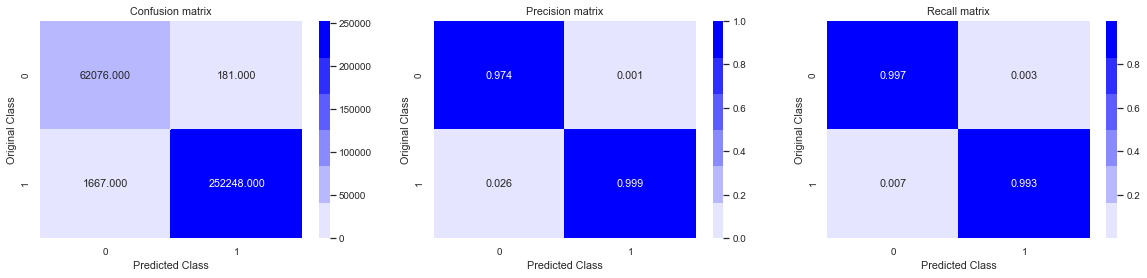

Test confusion_matrix


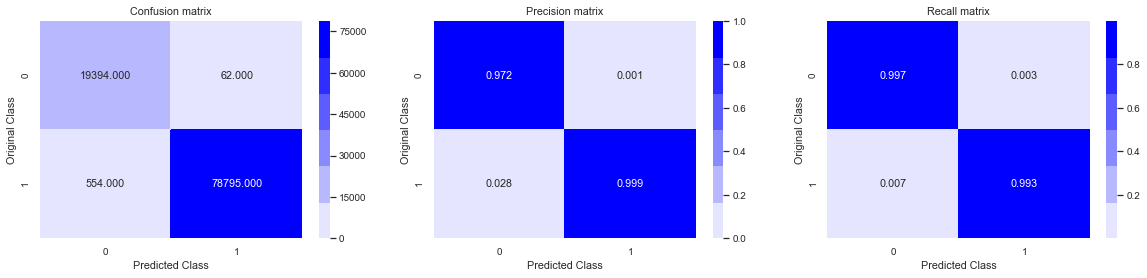

In [497]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,predict_y_tr)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,predict_y_te)

### 5.3.2 Important features from SVM model

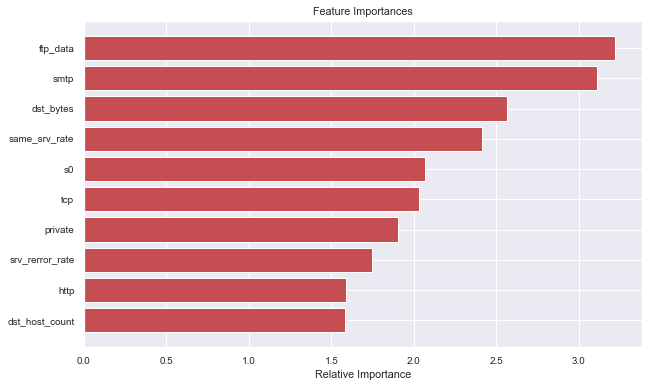

In [520]:
features=a
importances=abs(clf.coef_[0])
indices = (np.argsort(importances))[-10:]
plt.figure(figsize=(10,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show() 

## 5.4 Random Forest Classifier

In [521]:
from datetime import datetime
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform
start=datetime.now()
param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1,class_weight='balanced')

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='accuracy',random_state=25)

rf_random.fit(X_tr,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])
print('Total time taken is {}'.format(datetime.now()-start))

mean test scores [0.99724517 0.99741596 0.99701745 0.99713131 0.99803588]
mean train scores [0.99728629 0.99750031 0.99706981 0.99720335 0.9981023 ]
Total time taken is 0:14:28.288663


In [522]:
print(rf_random.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=14, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=28,
            min_samples_split=111, min_weight_fraction_leaf=0.0,
            n_estimators=121, n_jobs=-1, oob_score=False, random_state=25,
            verbose=0, warm_start=False)


In [523]:
clf=RandomForestClassifier(bootstrap=True, class_weight='balanced', criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

In [524]:
clf.fit(X_tr,y_train)
y_train_pred = clf.predict(X_tr)
y_test_pred = clf.predict(X_te)

In [525]:
print('Train accuracy is {}%'.format(accuracy(y_train,y_train_pred)*100))
print('Test accuracy is {}%'.format(accuracy(y_test,y_test_pred)*100))

Train accuracy is 99.75076856900674%
Test accuracy is 99.74495217853348%


Train confusion_matrix


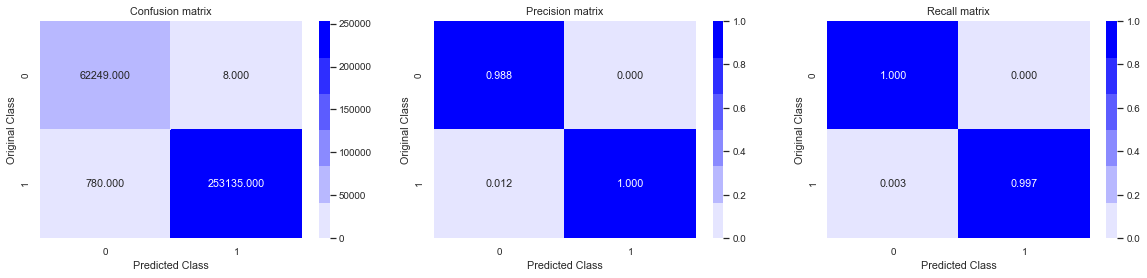

Test confusion_matrix


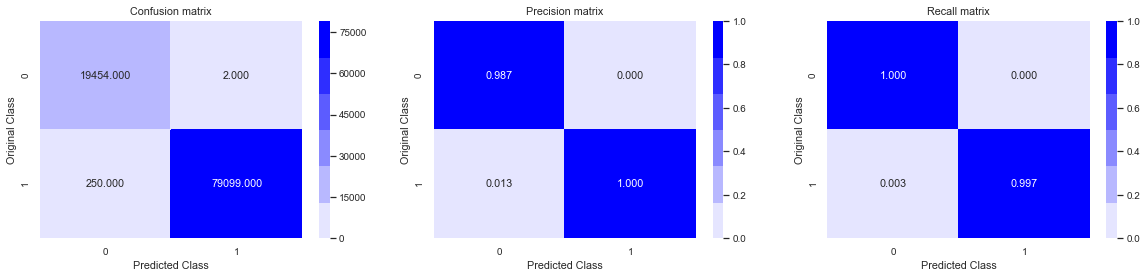

In [526]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

### 5.4.2 Top features using Random Forest

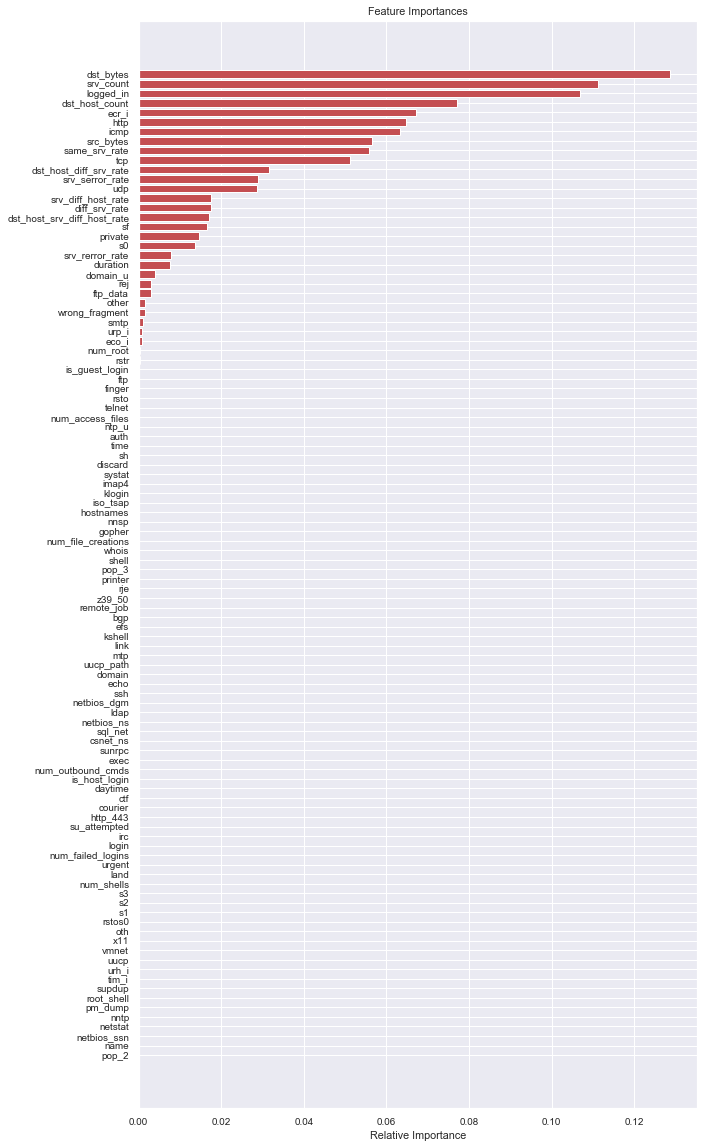

Total number of features are:  104


In [532]:
features = a
importances = clf.feature_importances_
indices = (np.argsort(importances))
plt.figure(figsize=(10,20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
print("Total number of features are: ",len(indices))

#### 5.4.2.1 Visualizing Decision Tree(max_depth=3)

In [59]:
from sklearn import tree
GF = tree.DecisionTreeClassifier(max_depth=3)
e=pd.DataFrame(a)
e=e.T
e.columns=a
GF = GF.fit(X_tr, y_train)
e.head(2)

,icmp,tcp,udp,auth,bgp,courier,csnet_ns,ctf,daytime,discard,...,is_guest_login,srv_count,srv_serror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_diff_srv_rate,dst_host_srv_diff_host_rate
0,icmp,tcp,udp,auth,bgp,courier,csnet_ns,ctf,daytime,discard,...,is_guest_login,srv_count,srv_serror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_diff_srv_rate,dst_host_srv_diff_host_rate


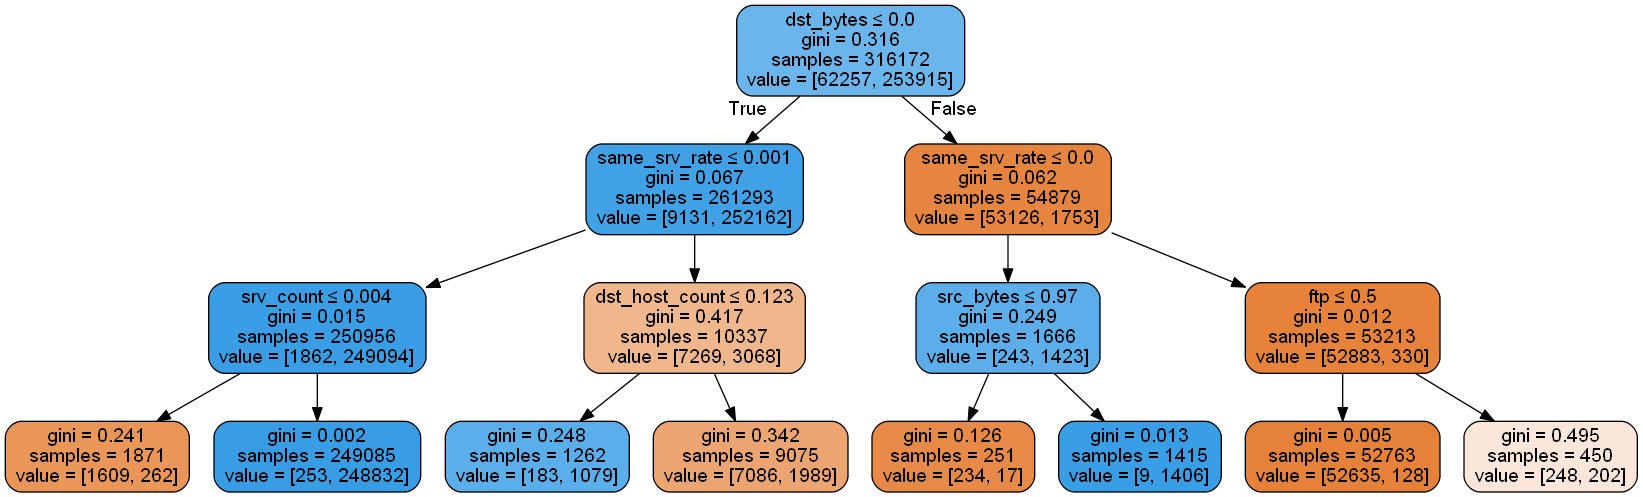

In [60]:
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
tree.export_graphviz(GF,out_file=dot_data,feature_names=e.columns,filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.set_size(100,100)
Image(graph.create_png())

#### 5.4.2.2 Visualizing Decision Tree(max_depth=4)

In [64]:
from sklearn import tree
GF = tree.DecisionTreeClassifier(max_depth=4)
GF = GF.fit(X_tr, y_train)

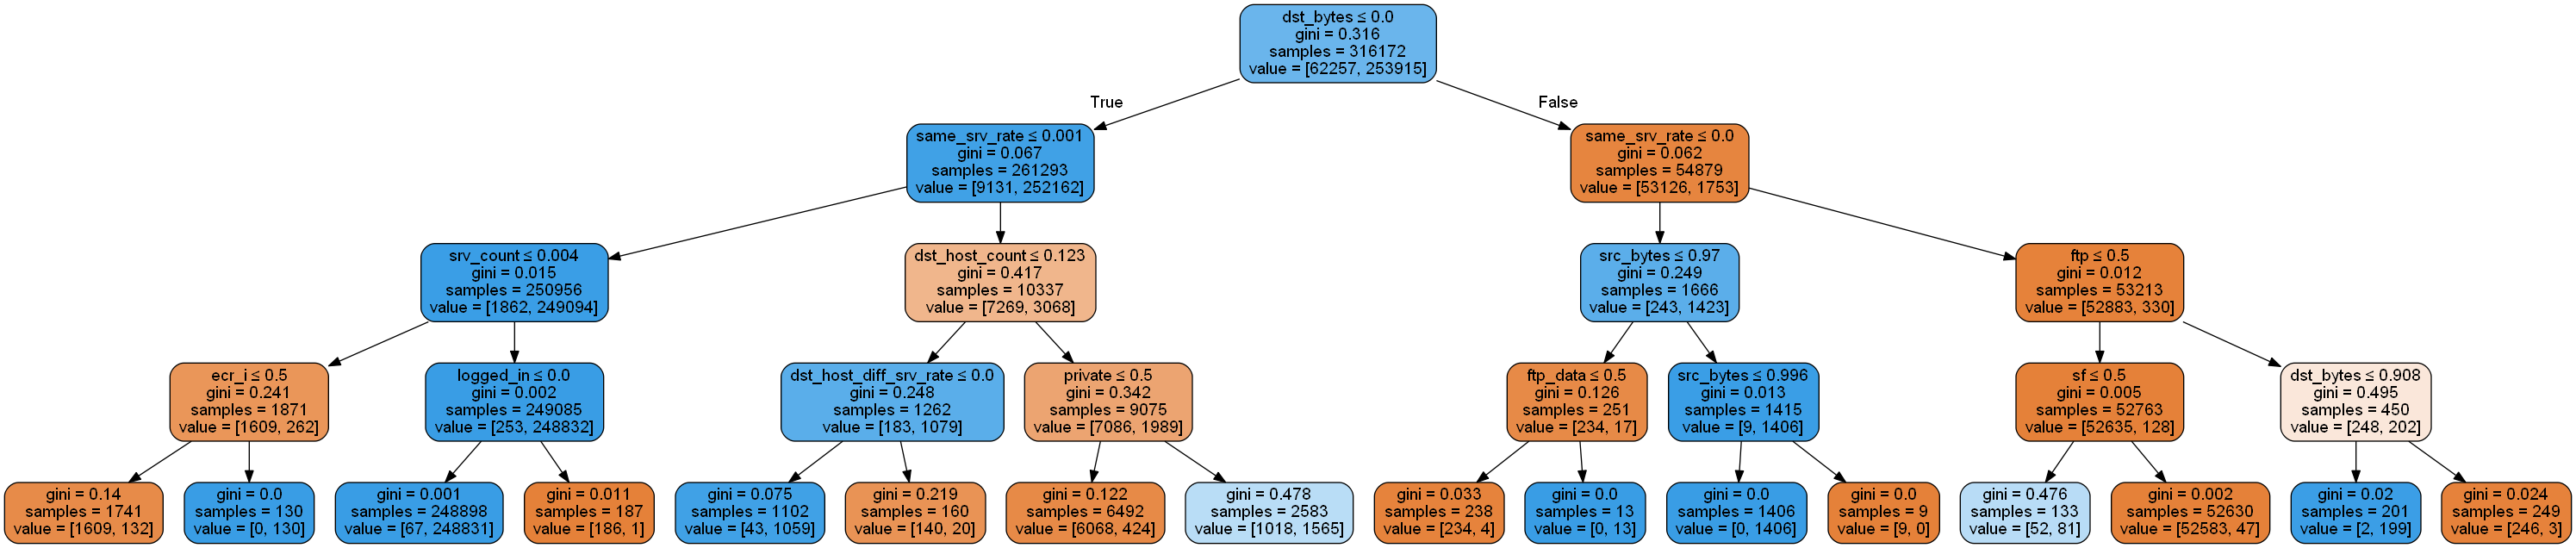

In [65]:
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
tree.export_graphviz(GF,out_file=dot_data,feature_names=e.columns,filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### 5.4.3 Top features excluding 0 feature importance features

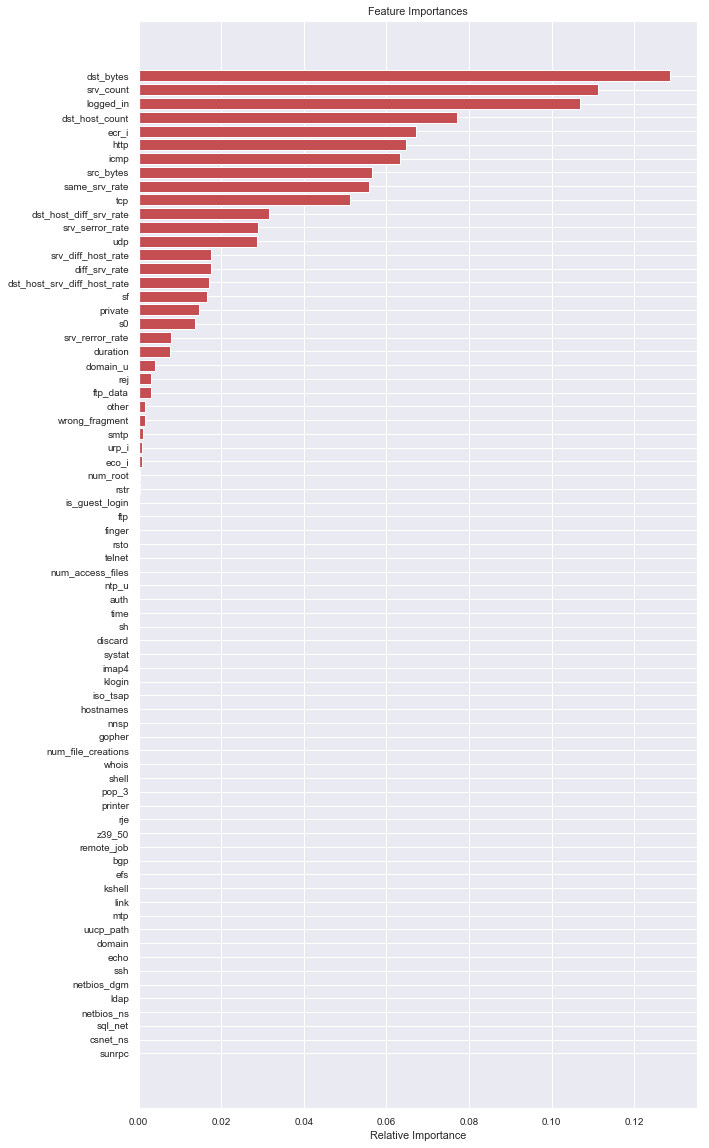

Total number of features after removing 0 feature importance features are:  72


In [540]:
features = a
importances = clf.feature_importances_
indices = (np.argsort(importances))
indices=[i for i in indices if importances[i]!=0]
plt.figure(figsize=(10,20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
print("Total number of features after removing 0 feature importance features are: ",len(indices))

Note:Some features have feature importance value close to zero but not exactly zero so they are shown in plot

## 5.5 Random Forest with Important Features

In [541]:
X_tr1=X_tr.tocsr()[:,indices].tocoo()
X_cv1=X_cv.tocsr()[:,indices].tocoo()
X_te1=X_te.tocsr()[:,indices].tocoo()

In [542]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform
start=datetime.now()
param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1,class_weight='balanced')

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='accuracy',random_state=25)

rf_random.fit(X_tr1,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])
print('Total time taken is {}'.format(datetime.now()-start))

mean test scores [0.99806434 0.99830788 0.99740331 0.99787774 0.99852296]
mean train scores [0.99814377 0.99835251 0.99740401 0.99789355 0.99856618]
Total time taken is 0:14:56.497277


In [543]:
print(rf_random.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=14, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=28,
            min_samples_split=111, min_weight_fraction_leaf=0.0,
            n_estimators=121, n_jobs=-1, oob_score=False, random_state=25,
            verbose=0, warm_start=False)


In [544]:
clf=RandomForestClassifier(bootstrap=True, class_weight='balanced', criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

In [545]:
clf.fit(X_tr1,y_train)
y_train_pred = clf.predict(X_tr1)
y_test_pred = clf.predict(X_te1)

In [546]:
print('Train Accuracy',accuracy(y_train,y_train_pred)*100)
print('Test Accuracy',accuracy(y_test,y_test_pred)*100)

Train Accuracy 99.86747719595664
Test Accuracy 99.86033095491119


Train confusion_matrix


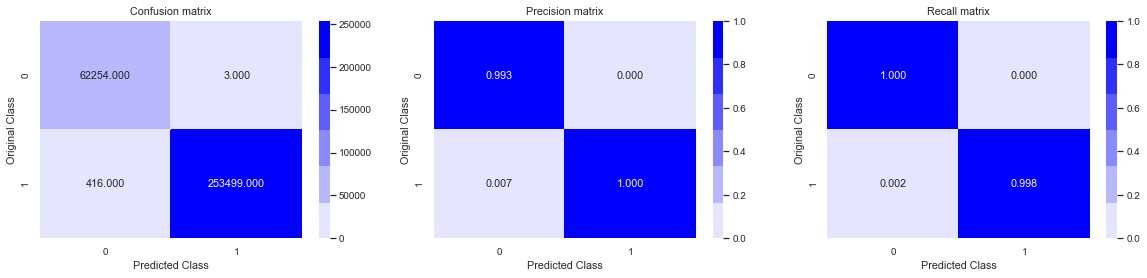

Test confusion_matrix


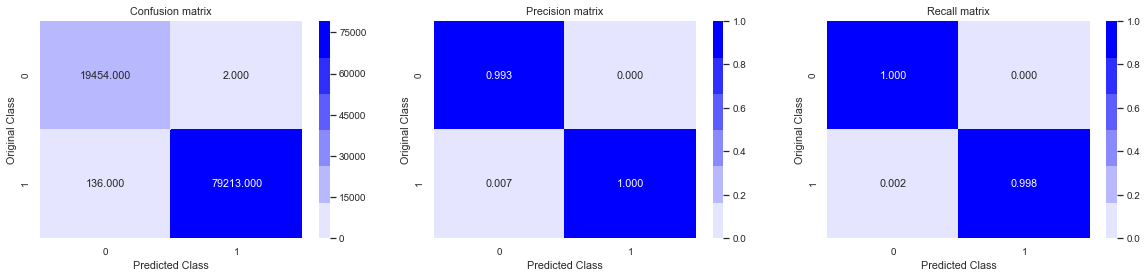

In [547]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

## 5.6 XGBoost classifier

In [548]:
from xgboost import XGBClassifier
n_estimators = [100,200,300,400,500]
max_depth = [2,4,6,8,10]
params = {"n_estimators":n_estimators,"max_depth":max_depth}
xgb = XGBClassifier(class_weight='balanced')
rsm = RandomizedSearchCV(xgb,params,cv=5,scoring='accuracy',n_jobs=-1)
rsm.fit(X_tr,y_train)
print("Best parameter obtained from RandomSearch CV: \n", rsm.best_params_)
print("Best Score : ", rsm.best_score_)

Best parameter obtained from RandomSearch CV: 
 {'n_estimators': 100, 'max_depth': 8}
Best Score :  0.9997659501790165


In [549]:
clf_xgb = XGBClassifier(n_estimators=100, max_depth= 8,class_weight='balanced')
clf_xgb.fit(X_tr,y_train)
y_train_pred_xgb = clf_xgb.predict(X_tr)
y_test_pred_xgb = clf_xgb.predict(X_te)
print('Train Accuracy',accuracy(y_train,y_train_pred_xgb)*100)
print('Test Accuracy',accuracy(y_test,y_test_pred_xgb)*100)

Train Accuracy 99.99652088103943
Test Accuracy 99.97672182581853


Train confusion_matrix


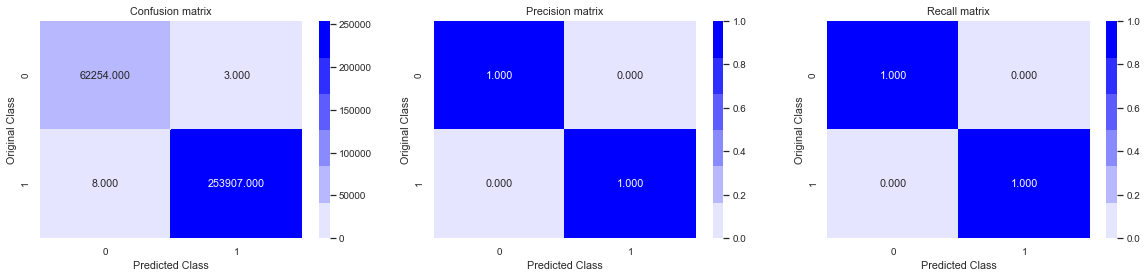

Test confusion_matrix


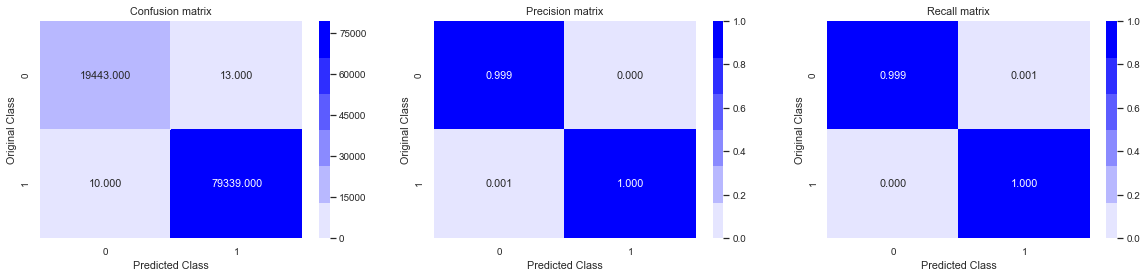

In [550]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred_xgb)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred_xgb)

### 5.6.2 Top 10 features using Xgboost

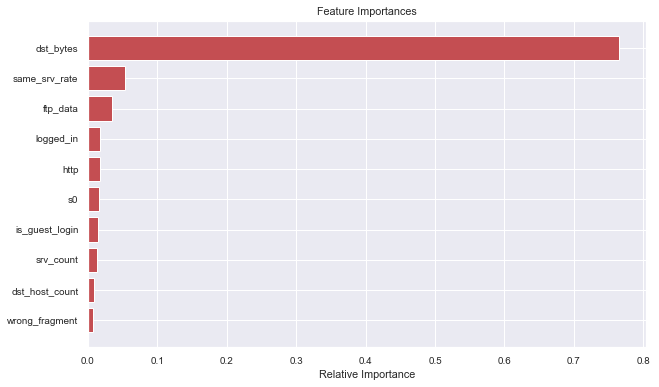

In [551]:
features = a
importances = clf_xgb.feature_importances_
indices = (np.argsort(importances))[-10:]
plt.figure(figsize=(10,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# 6.Summary

In [553]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Model","Hyperparameter","Hyperparameter value","Train Accuracy","Test Accuracy"]

x.add_row([ "Naive Bayes", 'alpha',0.0001,'98.63%','98.67%'])
x.add_row([ "Logistic Regression", 'C',1000 ,'99.66%','99.61%'])
x.add_row([ "SVM", 'alpha', 0.0001,'99.41%','99.35%'])
x.add_row([ "Random Forest", 'n_estimators',121, '99.75%','99.74%'])
x.add_row([ "RF with feature importance",'n_estimators',121,'99.86%','99.86%'])
x.add_row(["XGboost",'n_estimators',100,'99.99%','99.97%'])
print(x)

+----------------------------+----------------+----------------------+----------------+---------------+
|           Model            | Hyperparameter | Hyperparameter value | Train Accuracy | Test Accuracy |
+----------------------------+----------------+----------------------+----------------+---------------+
|        Naive Bayes         |     alpha      |        0.0001        |     98.63%     |     98.67%    |
|    Logistic Regression     |       C        |         1000         |     99.66%     |     99.61%    |
|            SVM             |     alpha      |        0.0001        |     99.41%     |     99.35%    |
|       Random Forest        |  n_estimators  |         121          |     99.75%     |     99.74%    |
| RF with feature importance |  n_estimators  |         121          |     99.86%     |     99.86%    |
|          XGboost           |  n_estimators  |         100          |     99.99%     |     99.97%    |
+----------------------------+----------------+-----------------

# 7.Conclusion

1. The problem statement was to detect whether given network traffic is normal or malicious.
2. The dataset consists of 494021 datapoints and 41 features.there are 3 catrgorical features and 38 numerical features.
3. EDA is carried out on the dataset which shows that there are 2-3 sub_categories in each category which are more dominant than others.
4. EDA also shown that most of the numerical features are highly correlated and having both does not add value to the modelling.
5. Then dataset is then split into train,test and cv dataset with 64% ,20%, 16% respectively.
6. Then catagorical features are encoded using one hot encoding whereas numerical features are normalized.
7. Prepared data is then applied to different machine learning models like Naive Bayes,Logistic Regression,SVM,Random Forest,and Xgboost for hyperparameter tuning.
8. All the models are performing really well.Best model is Xgboost which gives 99.99% train accuracy and 99.97% test accuracy.
9. Models are not overfitting as train and test accuracy is almost same.
10. Top features are selected using feature_importances_ of RF.We get improved accuracy.
11. From Confusion Matrix we conclude that we have successfully classified Normal Network Traffic and Malicious Network Traffic with 99.97% accuracy.